### Goal
Find an SCM which represents a plausible supply-and-demand market.

In [1]:
import numpy as np
import helper_functions as hf
from matplotlib import pyplot as plt
import time
import networkx as nx
from tqdm import tqdm
from itertools import combinations

In [2]:
# Adj = np.ones((4,4))
# Adj[0,0] = 0
# structure = hf.sample_market(Adj)
# obs_data = hf.sample_observational(structure)

In [3]:
Adj = np.array([[0,1,0],[1,1,1],[0,1,0]])
print(Adj)
for candidate in hf.all_d_separations(Adj):
    print(candidate)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [4]:
Fs = lambda P, Us: a*P**2 + Us
Fd = lambda P, X, Ud: -b*X*P + Ud
Fp = lambda P, S, D: P + D - S
Fx = lambda P, Ux: P*Ux

In [5]:
def sample_market_pure():
    a = np.random.uniform(.5,2)
    b = np.random.uniform(.5,2)
    Fs = lambda P, Us: a*P**2 + Us
    Fd = lambda P, X, Ud: -b*X*P + Ud
    Fp = lambda P, S, D: P + D - S
    Fx = lambda P, Ux: P*Ux
    
    def F(data):
        "Accepts 1d data, and computes update"
        So,Do,Po,Xo = data.reshape((4,None))
        S = Fs(P,Us)
        D = Fd(P,X,Ud)
        P = Fp(P,S,D)
        X = Fx(P,Ux)
        return np.hstack((S,D,P,X))
    
    return (F,(a,b),(Fs,Fd,Fp,Fx))

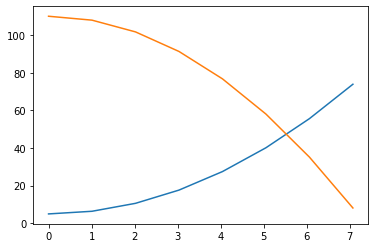

In [6]:
# visualize a single graph

(F,(a,b),(Fs,Fd,Fp,Fx)) = sample_market_pure()

Us = np.random.uniform(0,100)
Ud = np.random.uniform(100,200)
Ux = np.random.uniform(.5,1.7)

P = np.linspace(0,100,100)
S = Fs(P,Us)
X = Fx(P,Ux)
D = Fd(P,X,Ud)

m = D > 0

plt.plot(P[m],S[m]) # reverse of convention
plt.plot(P[m],D[m]) # reverse of convention
plt.show()

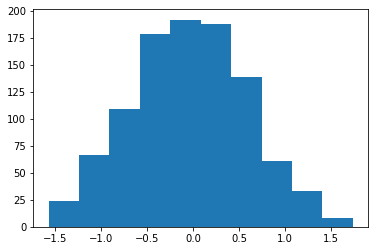

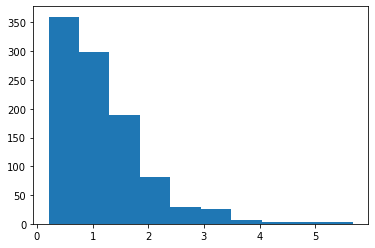

In [7]:
# Visualize how the ratio of the slopes at the equilibria are distributed
ratios = []
for i in range(1000):
    a = np.random.uniform(.5,2)
    b = np.random.uniform(.5,2)

    Us = np.random.uniform(0,100)
    Ud = np.random.uniform(100,200)
    Ux = np.random.uniform(.5,1.7)

    P = np.linspace(0,100,100)
    S = Fs(P,Us)
    X = Fx(P,Ux)
    D = Fd(P,X,Ud)

    m = D > 0

    # for item in [P,S,X,D]:
    #     plt.hist(item)
    #     plt.show()

    ratios.append(a/(b*Ux))
#     plt.plot(P[m],S[m]) # reverse of convention
#     plt.plot(P[m],D[m]) # reverse of convention
#     plt.show()

plt.hist(np.log(ratios))
plt.show()
plt.hist(ratios)
plt.show()

nonlinear: https://baelearn.uncg.edu/wordpress/ecomathreview/wp-content/uploads/sites/29/2015/04/NonlinearSupplyAndDemandTranscript.pdf

multi-dimensional: https://www.bengillen.com/uploads/1/2/3/8/123891022/blpcomplexproducts.pdf

a mix of both? https://www.econstor.eu/bitstream/10419/162075/1/857203274.pdf

search: "high dimensional supply and demand models"

wikipedia, common demand functions: https://en.wikipedia.org/wiki/Supply_and_demand#Partial_equilibrium